### Assignment_1_16110147_Sammed Shantinath Kagi

In [1]:
from nltk import word_tokenize
import re
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### tom.txt file is the file downloaded from gutenberg link given.

In [2]:
with open('tom.txt', 'r') as f:
    TS = f.read()
tokens = word_tokenize(TS)
types = {}
for word in tokens:
    word = word.lower()
    if word in types:
        count = types.get(word,0)
        types[word]=count+1
    else:
        types[word]=1
print("Number of Tokens:" + str(len(tokens)))
print("Number of Types:" + str(len(types)))
print("Type-Token Ratio:" + str(len(types)/len(tokens)))

Number of Tokens:91299
Number of Types:8422
Type-Token Ratio:0.09224635538176759


In [3]:
#print(types)
sorted_data = sorted(types.items(), reverse = True, key = itemgetter(1))

#### sorted_data is the list of tuples of the format (word, frequency_of_the_word) in a sorted way with respect to fequencies.

## Zipf's Law: Rank - Frequency

Text(0.5,1,'Rank(X) vs Frequency(Y)')

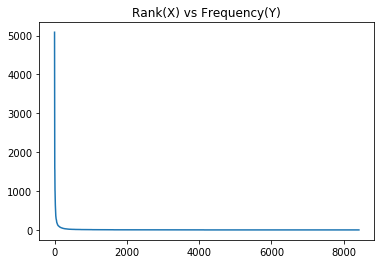

In [4]:
X_1 = range(1,len(sorted_data)+1)
Y_1 = [x[1] for x in sorted_data]
plt.plot(X_1,Y_1)
plt.title("Rank(X) vs Frequency(Y)")

#### In the above graph I have assumed that the types with same frequency have consecutive ranks (different ranks)

Text(0.5,1,'Rank(X) vs Unique_Frequency(Y)')

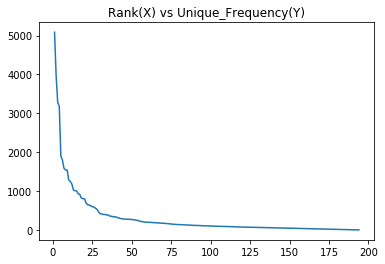

In [5]:
unique_frequencies = []
for i in sorted_data:
    if i[1] not in unique_frequencies:
        unique_frequencies.append(i[1])
ranks = range(1,len(unique_frequencies)+1)
plt.plot(ranks,unique_frequencies)
plt.title("Rank(X) vs Unique_Frequency(Y)")

#### In this graph we are taking only the unique frequencies and their corresponding ranks to understand the distribution better.

## Zipf's Law: Meaning - Frequency

Text(0.5,1,'Number of Meanings(X) vs Frequency(Y)')

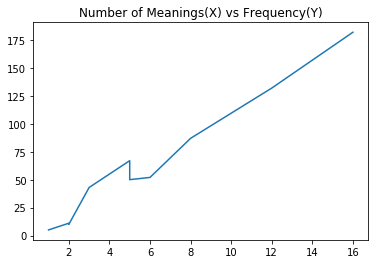

In [6]:
meaning_list = {'heart':5, 'project':8, 'missouri':1, 'time':16, 'comrade':2,'over':12,'eyes':5,'joy':2,'gone':3,'next':6}
meaning_list = sorted(meaning_list.items(), reverse = True, key = itemgetter(1))
meaning_no = []
freq_mean = []
for i in meaning_list:
    meaning_no.append(i[1])
    for j in sorted_data:
        if(j[0] == i[0]):
            freq_mean.append(j[1])
plt.plot(meaning_no,freq_mean)
plt.title("Number of Meanings(X) vs Frequency(Y)")

## Zipf's Law: Lenght - Frequency

In [7]:
avg_array = {}
for t in sorted_data:
    count = avg_array.get(len(t[0]),[])
    avg_array[len(t[0])] = count + [t[1]]
for i in avg_array.keys():
    avg_array.update({i:sum(avg_array[i])/len(avg_array[i])})

#### avg_array contains the average frequency for a lenght of word.{lenght of the word: average frequency corresponding to this lenght}

Text(0.5,1,'Lenght(X) vs Frequency(Y)')

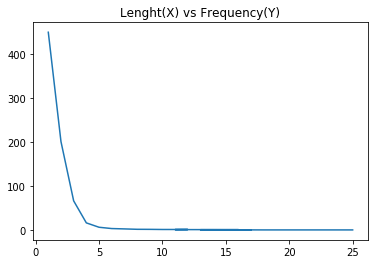

In [8]:
sorted_avg_array = sorted(avg_array.items(), reverse = True, key = itemgetter(1) )
X_2 = [x[0] for x in sorted_avg_array]
Y_2 = [x[1] for x in sorted_avg_array]
plt.plot(X_2,Y_2)
plt.title("Lenght(X) vs Frequency(Y)")

## Heaps Law

In [ ]:
N=[]
V=[]
with open('tom.txt', 'r') as f:
    lines = f.readlines()
lines = list(filter(lambda a: a != '\n', lines))
leap = 50
#print(len(lines))
while(leap<len(lines)):
    string = ''
    for i in range(leap):
         string+=lines[i]
    mini_tokens= word_tokenize(string)
    N.append(len(mini_tokens))
    mini_types = {}
    for word in mini_tokens:
        word = word.lower()
        if word in mini_types:
            count = mini_types.get(word,0)
            mini_types[word]=count+1
        else:
            mini_types[word]=1
    V.append(len(mini_types))
    leap = leap + 50
print("Tokens set:", N)
print("Vocabulory set:",V)

K=12.142046994654013
Beta=0.572437860643196


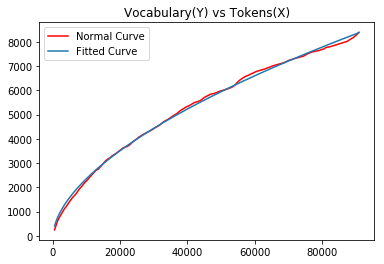

In [11]:
def heaps(N,K, Beta):
    return K*(N**Beta)
from scipy.optimize import curve_fit
P, Q = curve_fit(heaps,N,V)
print("K=" + str(P[0]))
print("Beta=" + str(P[1]))

plt.plot(N,V,'r', label = "Normal Curve")
plt.plot(N,heaps(N,P[0],P[1]),label = "Fitted Curve")
plt.title("Vocabulary(Y) vs Tokens(X)")
plt.legend()
plt.show()
